<a href="https://colab.research.google.com/github/Yue1Harriet1/methods_of_data_analysis/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter – **

*This notebook contains all the sample code.*

# Data Exploration

- scatterplots

# Types

- ReLU

- Sigmoid
	- for binary classification probabilities
	- differentiable in backpropagation algorithms
	- smooth gradients, not exploding
	- with vanishing gradients
	- mean output is 0.5

	$$
  f(x) -> [0,1], x \in R
  $$

- softmax

- tanh
  - mean out put is 0

  $$
	f(x) -> [-1,1], x \in R
	$$

# Training and Testing Models with Different Activation Functions


In [ ]:
def train(network, data_loader, criterion, optimizer, device):
    network.train()
    running_loss = 0.0

    for data, target in data_loader: #iterate through the data loader
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target) #compute the loss
        loss.backward() #performs the backpropagation
        optimizer.step() #optimization

        running_loss += loss.item() * data.size(0)

    return running_loss / len(data_loader.dataset)

def test(network, data_loader, criterion, device):
    network.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)

            output = network(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return test_loss / len(data_loader.dataset), 100 * correct / total

In [ ]:
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/393.1 MB 133.4 MB/s eta 0:00:03

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.27MB/s]


Training with ReLU activation function...
Epoch [1/10], Test Loss: 0.1509, Test Accuracy: 95.66%
Epoch [2/10], Test Loss: 0.1088, Test Accuracy: 96.60%
Epoch [3/10], Test Loss: 0.0872, Test Accuracy: 97.14%
Epoch [4/10], Test Loss: 0.0854, Test Accuracy: 97.35%
Epoch [5/10], Test Loss: 0.0758, Test Accuracy: 97.57%
Epoch [6/10], Test Loss: 0.0695, Test Accuracy: 97.82%
Epoch [7/10], Test Loss: 0.0697, Test Accuracy: 97.92%
Epoch [8/10], Test Loss: 0.0772, Test Accuracy: 97.83%
Epoch [9/10], Test Loss: 0.0924, Test Accuracy: 97.32%
Epoch [10/10], Test Loss: 0.0776, Test Accuracy: 97.70%
Training with Sigmoid activation function...
Epoch [1/10], Test Loss: 0.2428, Test Accuracy: 92.85%
Epoch [2/10], Test Loss: 0.1650, Test Accuracy: 95.08%
Epoch [3/10], Test Loss: 0.1385, Test Accuracy: 95.87%
Epoch [4/10], Test Loss: 0.1042, Test Accuracy: 96.64%
Epoch [5/10], Test Loss: 0.0949, Test Accuracy: 97.10%
Epoch [6/10], Test Loss: 0.0850, Test Accuracy: 97.36%
Epoch [7/10], Test Loss: 0.0797,

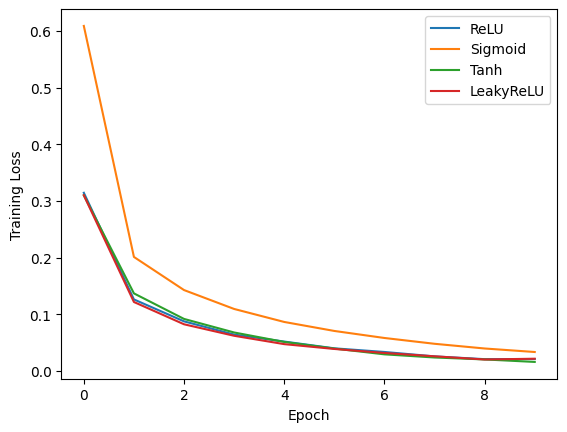

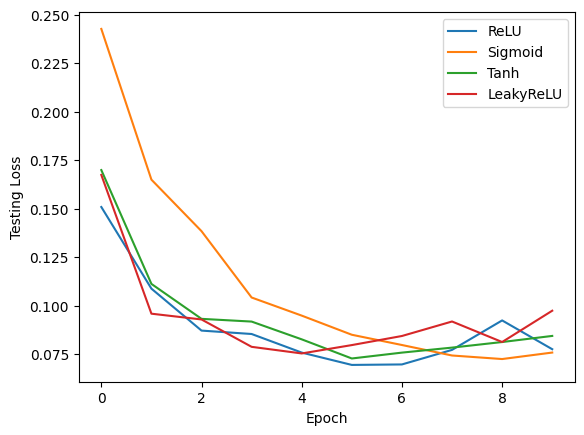

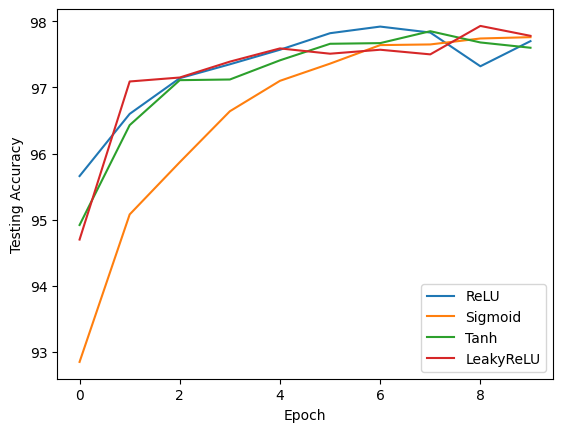

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
learning_rate = 0.001

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_function):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.activation_function(self.layer1(x))
        x = self.activation_function(self.layer2(x))
        x = self.layer3(x)
        return x

results = {}

# Train and test the model with different activation functions
for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")

    model = NeuralNetwork(input_size, hidden_size, num_classes, activation_function).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = test(model, test_loader, criterion, device)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    results[name] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_accuracy_history': test_accuracy_history
    }

# Plot the training loss
plt.figure()
for name, data in results.items():
    plt.plot(data['train_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Plot the testing loss
plt.figure()
for name, data in results.items():
    plt.plot(data['test_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
plt.show()

# Plot the testing accuracy
plt.figure()
for name, data in results.items():
    plt.plot(data['test_accuracy_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()